In [1]:
# before and after polished comparison

%load_ext autoreload
%autoreload 2
%reset -f
from imports import *
# df = pd.read_csv("/home/ben_rasoolov/additive_project/data/paper/data/global_stats_equalize_hist_v02.csv")

box_files = {
    "morePolished_V07_T1_Left(Bottom)_500X_3D.csv": 'https://auburn.box.com/shared/static/fmdgsitx225kiz856uzmmdxlo30pepyi.csv',
    "morePolished_V07_T1_Right(Top)_500X_3D.csv": "https://auburn.box.com/shared/static/xgoav7ttot5kgsgoul1ee2p5cy5vuct9.csv",
    "morePolished_V07_T2_Right(Top)_500X_3D.csv": "https://auburn.box.com/shared/static/7t3g815aioj4zwkzl33jx1tsivvd8cm6.csv",
    "morePolished_V07_T2_Left(Bottom)_500X_3D.csv": "https://auburn.box.com/shared/static/cy4ny0h4kzs1322htsfh7y35h78rd7uu.csv",
}

from additive.utility import download_from_dict

# download_from_dict(box_files, "/home/ben_rasoolov/additive_project/data/original_images/")

files = glob.glob("/data/additive_project/data/original_images/morePolished_*csv")
files

from additive.utility import extract_array_from_csv

with Pool(4) as p:
    out = p.map(extract_array_from_csv, files)

from additive.utility import image_rescale
images_d = image_rescale(files)
with Pool(4) as p:
    with dask.config.set(pool=p):
        images = images_d.compute()

files = glob.glob("/home/ben_rasoolov/additive_project/data/original_images/morePolished_*pd")
files

from additive.utility import dfe
from collections import namedtuple
ImageInfo = namedtuple("ImageInfo", "x")
root = "/home/ben_rasoolov/additive_project/data/experiment_04/"
for file, image in zip(files, images):
    d, f, e = dfe(file)
    new_path = root + f + ".info"
    joblib.dump({'value': ImageInfo(image)}, new_path)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(7269, 7725)
(7256, 7717)
(6854, 7711)


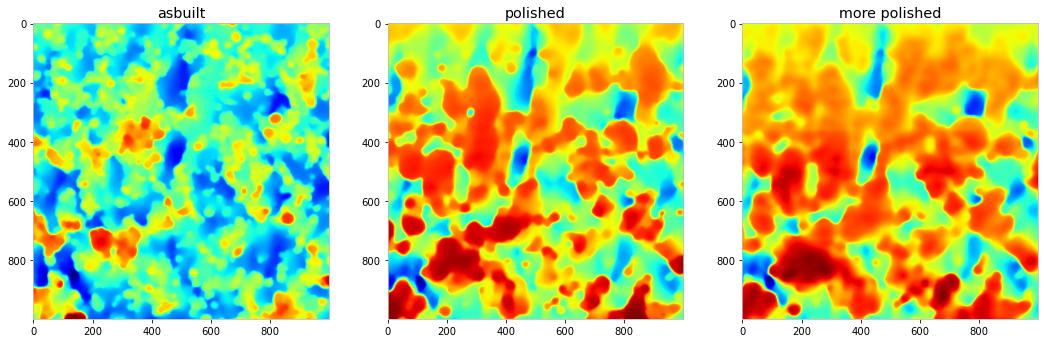

In [8]:
%load_ext autoreload
%autoreload 2
%reset -f
from imports import *
from additive.features import ImageInfo, Features
# df = pd.read_csv("/home/ben_rasoolov/additive_project/data/paper/data/global_stats_equalize_hist_v02.csv")

files = glob.glob("../../data/experiment_04/*info")
files

ImageInfo = namedtuple("ImageInfo", "x")
def load_images(x):
    return joblib.load(x)['value'].x
with Pool(6) as p:
    images = p.map(load_images, files)

# from scipy.stats import mode
# from additive.feature_functions import feature_functions_functions as feat_funs
# def image_stats(x):
#     funs = {k: v for k, v in feat_funs.items()}
#     return compute({k: delayed(v)(x) for k, v in funs.items()})[0]
# 
# res = [image_stats(x[500:-500, 500:-500]) for x in images]
# 
# pd.DataFrame(res).assign(file=[x.split("/")[-1] for x in files])
# 
# def min_max_scale(x, a=0, b=1):
#     mn, mx = x.min(), x.max()
#     rng = b - a
#     out = (x - mn)/(mx-mn)
#     return out * rng + a
# 
# def get_equalized_stats(image):
#     scaled_image = min_max_scale(image, 0, 255).astype('uint8')
#     equalized_image = cv2.equalizeHist(scaled_image)
#     return image_stats(equalized_image)
# 
# equalized_res = compute([delayed(get_equalized_stats)(x[500:-500, 500:-500]) for x in images])[0]
# 
# pd.DataFrame(equalized_res).assign(file=[x.split("/")[-1] for x in files])[['rp_1d', 'rv_1d', 'mode_1d', 'file']]\
#     .sort_values(['mode_1d'])

dd = dict(zip([x.split("/")[-1] for x in files], images))

im1 = dd['V07_T1_Left(Bottom)_500X_3D.info']
im2 = dd['Polished_V07_T1_Left(Bottom)_500X_3D.info']
im3 = dd['morePolished_V07_T1_Left(Bottom)_500X_3D.info']
ims = [im1, im2, im3]
names = ['asbuilt', 'polished', 'more polished']
dxs = [-450, -430, -600]
dys = [650, 1620, 720]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sub_ims = []
for name, im, ax, dx, dy in zip(names, ims, axes, dxs, dys):
    print(im.shape)
    sub_im = im[1000+dx:2000+dx, 1000+dy:2000+dy]
    ax.imshow(sub_im, cmap='jet')
    sub_ims.append(sub_im)
    ax.set_title(name)
    ax.grid(False)
# plt.savefig("../data/paper/figures/polishedVsHalfVsMorePolished3D.png", dpi=300)

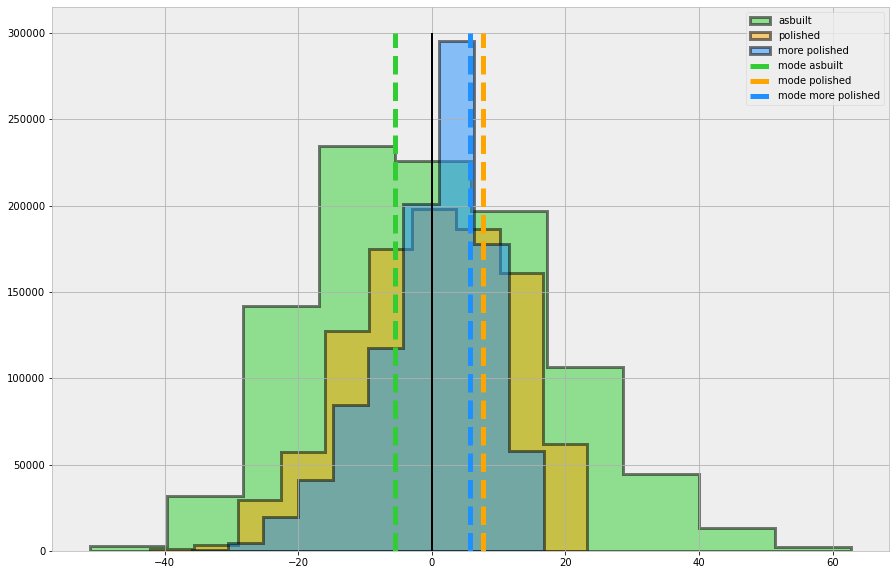

In [6]:
from additive.feature_functions import *
plt.subplots(figsize=(15, 10))
colors = ['limegreen', 'orange', 'dodgerblue']
for i, (sub_im, label, color) in enumerate(zip(sub_ims, names, colors)):
    plt.hist(sub_im.reshape(-1) - sub_im.mean(), alpha=.5, label=label, color=color, histtype='stepfilled', 
            lw=3, edgecolor='black')
    plt.vlines(mode_1d(sub_im), 0, 300000, label=f"mode {label}", color=color, lw=5, ls='dashed')
plt.vlines(0, 0, 300000, label='mean' if i==0 else '')
plt.legend()

In [33]:
import json, matplotlib
s = json.load( open("../styles/bmh_matplotlibrc.json") )
matplotlib.rcParams.update(s)

In [5]:
ls /data/additive_project/data/experiment_03/*df

/data/additive_project/data/experiment_03/global_stats_01.df*
/data/additive_project/data/experiment_03/global_stats.df*
/data/additive_project/data/experiment_03/local_stats_01.df*
/data/additive_project/data/experiment_03/local_stats.df*
/data/additive_project/data/experiment_03/polished_vs_asbuilt_top_left_matches.df


In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
from imports import *
local_stats = pd.read_pickle("../../data/experiment_03/local_stats_01.df")

In [2]:
cols = ['specimen', 'T', 'RL', 'ispolished']
polished = local_stats[local_stats['ispolished']].groupby(cols).mean()
asbuilt  = local_stats[~local_stats['ispolished']].groupby(cols).mean()

In [3]:
polished.merge(asbuilt, on=['specimen', 'T', 'RL'])

rho95_x       rho_x   rho95_y      rho_y
specimen T  RL                                            
v01      t1 l    7.011257   29.375026  3.821107  16.736877
            r    6.363697   28.536000  3.724530  16.796252
         t2 l    8.581970   46.648828  4.877868  23.448034
            r    8.175849   45.163566  4.938359  20.308949
v03      t1 l    7.797544   81.838414  4.030588  15.768502
            r    8.094344   71.663442  4.177599  17.688913
         t2 l    7.377906   43.729981  5.425305  24.432171
            r    7.767045   63.697105  5.900027  26.217600
v05      t1 l    7.550057   68.145736  4.608824  20.315271
            r    7.650519   45.882957  4.782590  20.812794
         t2 l    7.007655   49.984323  5.006784  21.644659
            r    6.582251   48.184883  4.878152  24.571295
v07      t1 l    9.062464   49.896463  5.486006  23.676251
            r    8.436367   49.347458  4.885345  21.221477
         t2 l    6.268471   29.327276  4.408225  19.280686
v09      t1 l   15.266234   68.718234  4.514883  22.773760
            r   12.619500  137.960599  4.684823  20.718575
         t2 l    7.707276   59.222554  4.304554  19.380108
            r    7.060737   53.856994  4.422722  23.592344
v11      t1 l    8.597230   84.669007  4.152026  17.308337
            r   12.252479   88.901733  4.290688  18.438552
         t2 l    6.371553   47.138680  4.247682  19.199511
            r    7.867259   54.877340  4.286789  18.272707
v13      t1 l    7.725055   55.648538  4.027058  17.833625
            r   17.215478   68.991342  4.142658  17.983854
v15      t1 l    7.656679   61.105944  3.782150  17.278210
            r    7.604878   48.666625  3.746183  16.634582
v17      t1 l    6.928186   43.487334  3.909429  14.966006
            r   10.602913   51.578358  3.830678  14.457154
         t2 l    7.271608   41.375723  4.179945  16.162528

In [7]:
import tensorflow as tf

In [39]:
%reset -f
%load_ext autoreload
%autoreload 2
from imports import *
import tensorflow as tf
file = "../../data/experiment_03/Polished_V01_T2_Right(Top)_500X_3D.info"
def get_range(img, cnt):
    val = img[cnt[:, 0, 1], cnt[:, 0, 0]]   
    return val.max()-val.min()
def get_radii(file, n=300):
    data = joblib.load(file)
    try:
        img = np.array(data['value'].x)
    except:
        img = data
    img = img[1000:-1000, 1000:-1000]
    avged = tf.nn.avg_pool(img.reshape(-1, *img.shape), n, 1, 'SAME').numpy()[0]
    ssq = tf.nn.avg_pool(img.reshape(-1, *img.shape)**2, n, 1, 'SAME').numpy()[0]
    out = (ssq - avged**2)
    stded = np.sqrt(out)
    val_ = (img < (avged-3*stded)).astype('uint8')
    _, contours, _ = cv2.findContours(val_, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    return np.mean([get_range(img, x)/(cv2.contourArea(x)+1e-9) for x in contours])
    # return stded[img < (avged - 3*stded)].mean()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
polished_files = glob.glob("../../data/experiment_03/Polished*")
unpolished_files = [x.replace('Polished_', '') for x in polished_files]
files = polished_files + unpolished_files

In [41]:
res = list(map(get_radii, files))

/home/bzr0014/miniconda3/envs/additive/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
/home/bzr0014/miniconda3/envs/additive/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


In [15]:
data = pd.DataFrame(zip([x.split('/')[-1] for x in files], np.array(res)/1e6))
data.columns = ['file', 'mu']

In [16]:
from additive.utility import get_file_info

In [17]:
radii = get_file_info(data, 'file').drop('file', 1)

In [18]:
t1_ = radii[radii['ispolished']]
t2_ = radii[~radii['ispolished']]
stds = t1_.merge(t2_, on=['specimen', 'RL', 'T'])

In [19]:
stds.groupby(['specimen']).mean()

,ispolished_x,mu_x,ispolished_y,mu_y
specimen,,,,
V01,True,16.976261,False,80.260823
V03,True,4.029257,False,22.207443
V05,True,4.112274,False,15.176622
V07,True,20.639258,False,27.974328
V09,True,4.366645,False,38.688830
V11,True,2.838004,False,26.089463
V13,True,6.026826,False,41.893231
V15,True,6.679234,False,16.005178
V17,True,7.770677,False,26.108750


In [20]:
def get_radii2(file, n=300):
    data = joblib.load(file)
    try:
        img = np.array(data['value'].x)
    except:
        img = data
    img = img[1000:-1000, 1000:-1000]
    avged = tf.nn.avg_pool(img.reshape(-1, *img.shape), n, 1, 'SAME').numpy()[0]
    ssq = tf.nn.avg_pool(img.reshape(-1, *img.shape)**2, n, 1, 'SAME').numpy()[0]
    out = (ssq - avged**2)
    stded = np.sqrt(out)
    return img, stded, avged

In [28]:
tmp_ = get_radii2(files[-2])

In [29]:
def get_range(img, cnt):
    val = img[cnt[:, 0, 1], cnt[:, 0, 0]]   
    return val.max()-val.mean()

In [30]:
a, b, c = tmp_

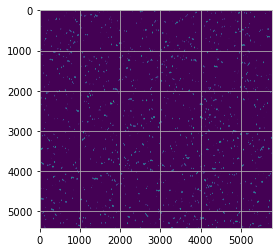

In [32]:
plt.imshow(a * (a < c - 2*b))

In [38]:
(a == cv2.erode(a, np.ones((50, 50))))

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])